# <center> Linearização de regiões convexas
    
## <center> Carolina Monteiro e José Arthur

## <center> Junho de 2022

### Introdução

Vamos considerar problemas de otimização onde a função objetivo é linear e a região viável é convexa e com derivadas conhecidas nos pontos de seu bordo. Mais particularmente estamos interessados em regiões definidas por funções (a princípio, unidimensionais) convexas e diferenciáveis.

### Definições

Uma região convexa pode ser definida como uma região onde todo segmento traçado de dois pontos dela está também todo contido nela.

Na figura abaixo, o primeiro polígono é uma região **NÃO** convexa. O segmento que liga o ponto C ao ponto H, por exemplo, tem pontos fora do polígono. Já o segundo polígono é uma região convexa.

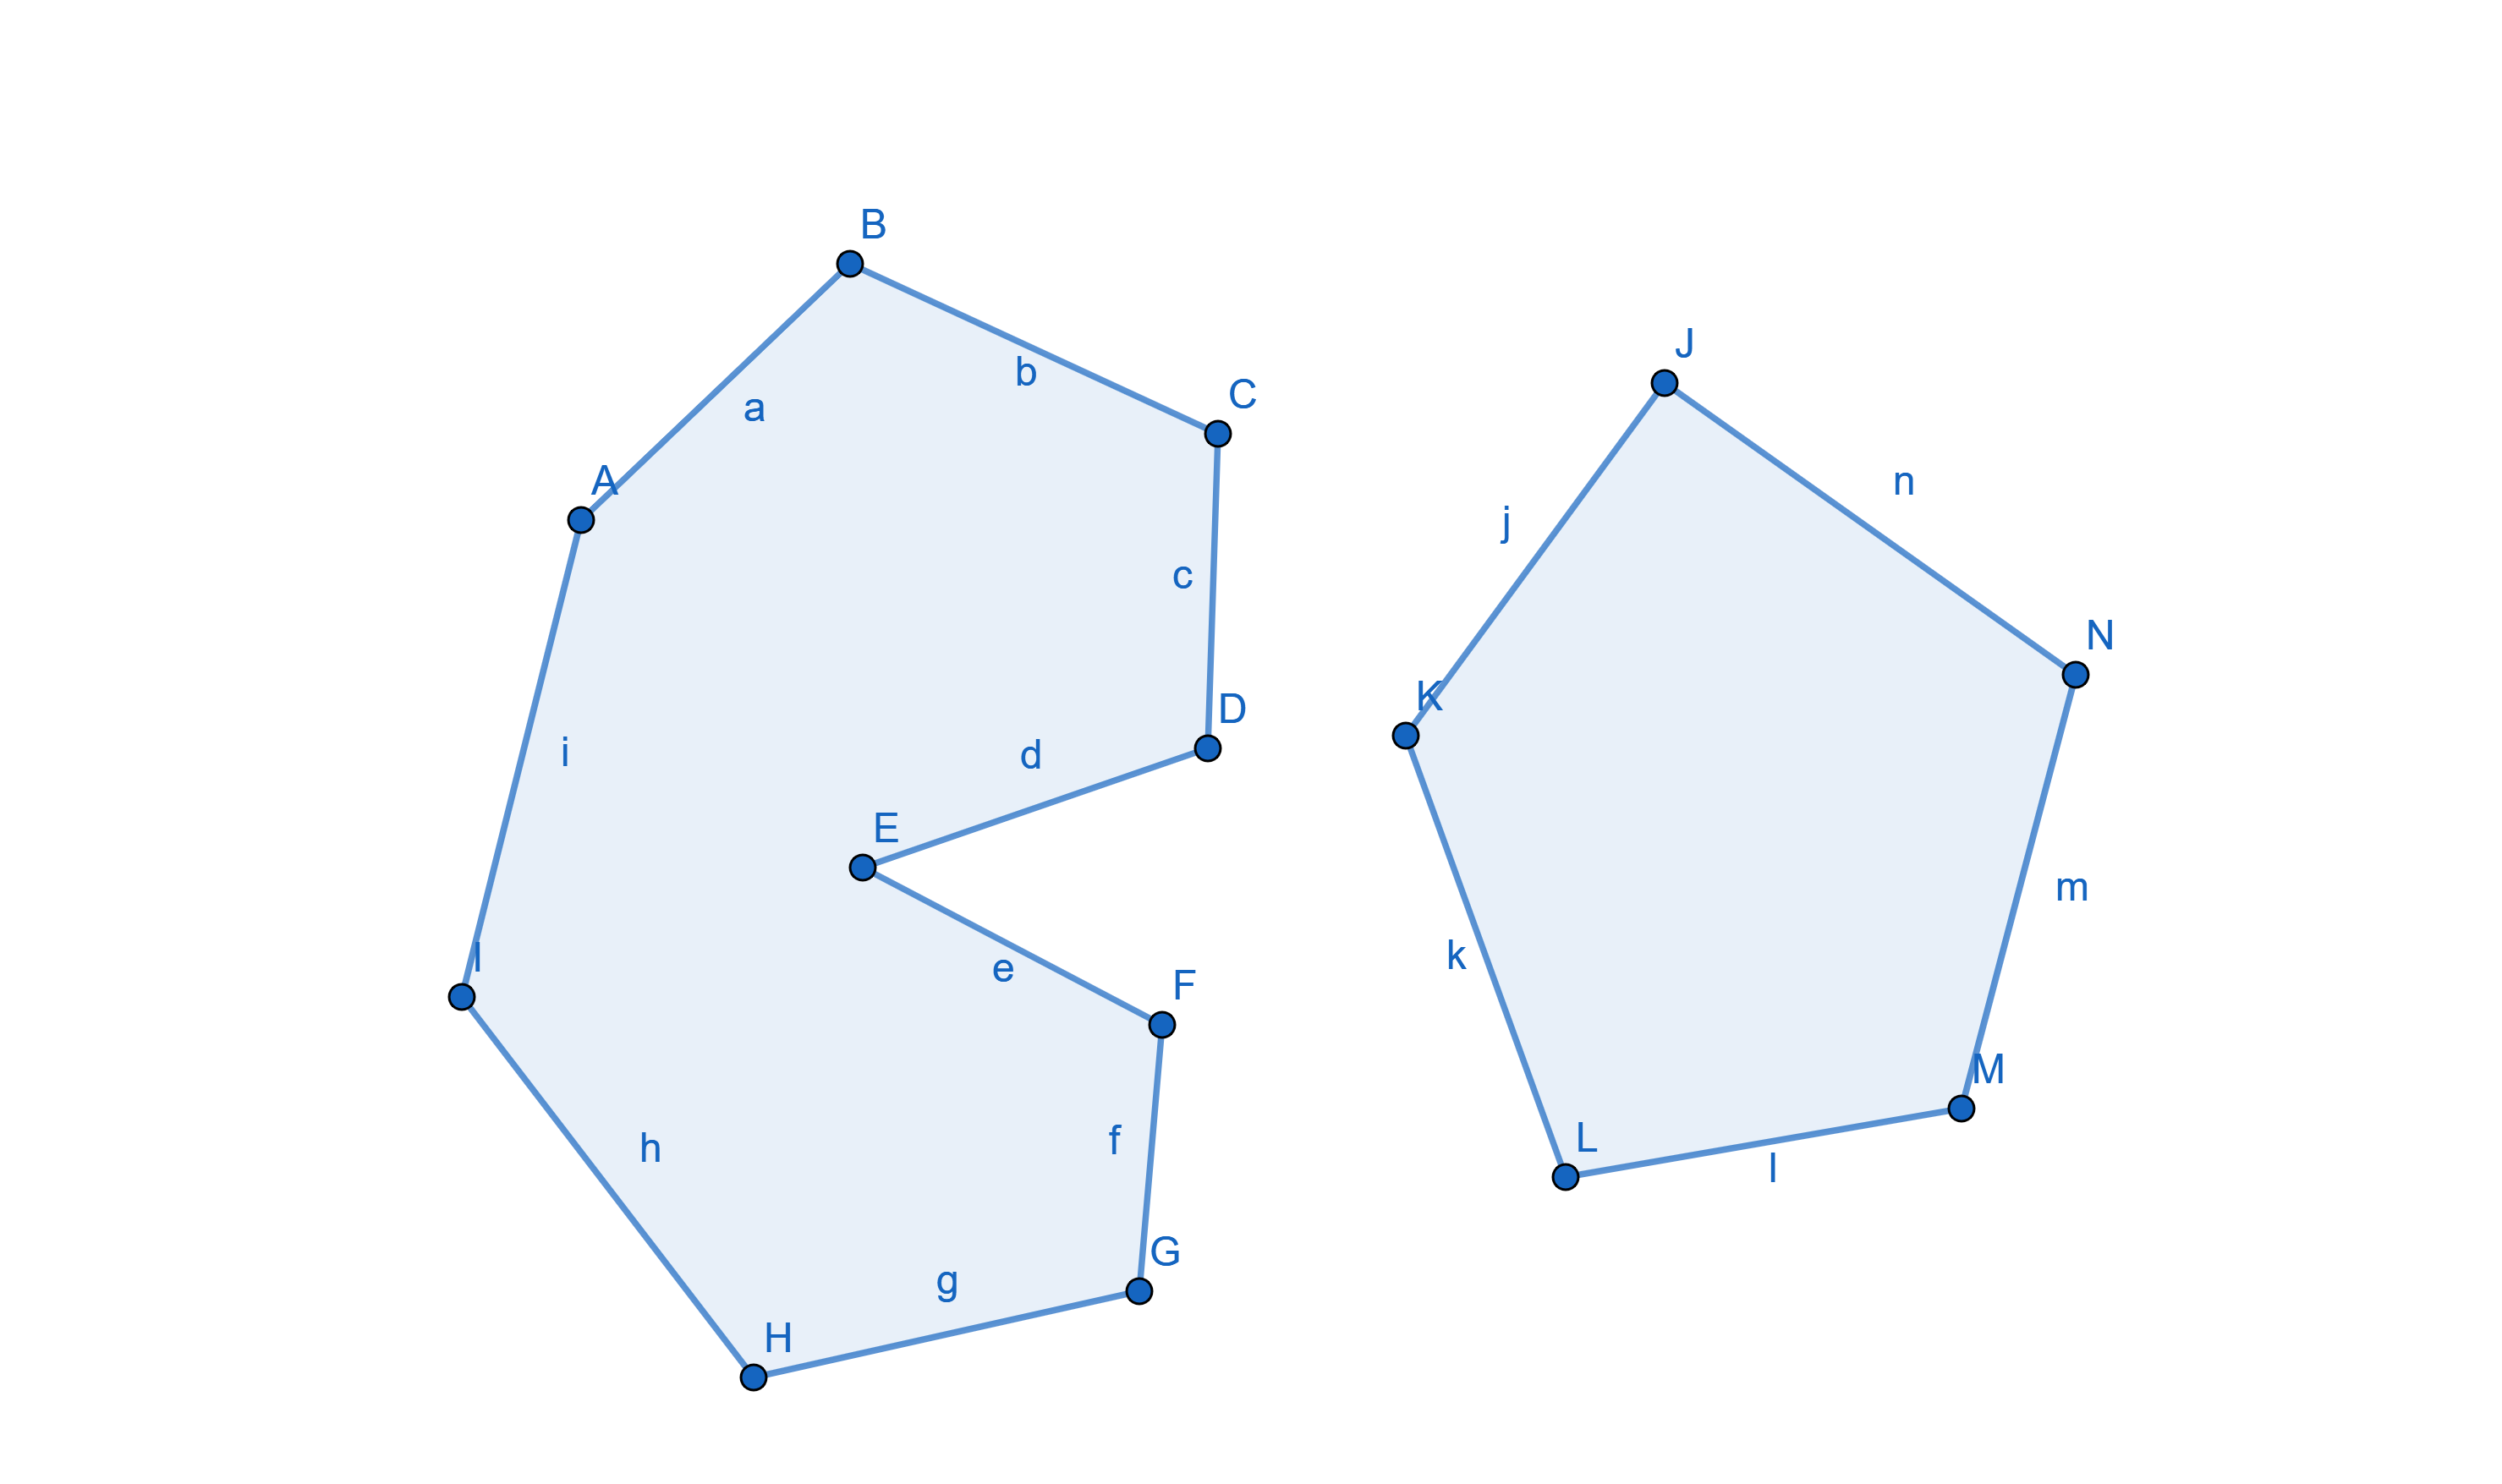

Essa definição vale para regiões definidas por funções também.

Na figura abaixo, a função exponencial define uma região convexa.

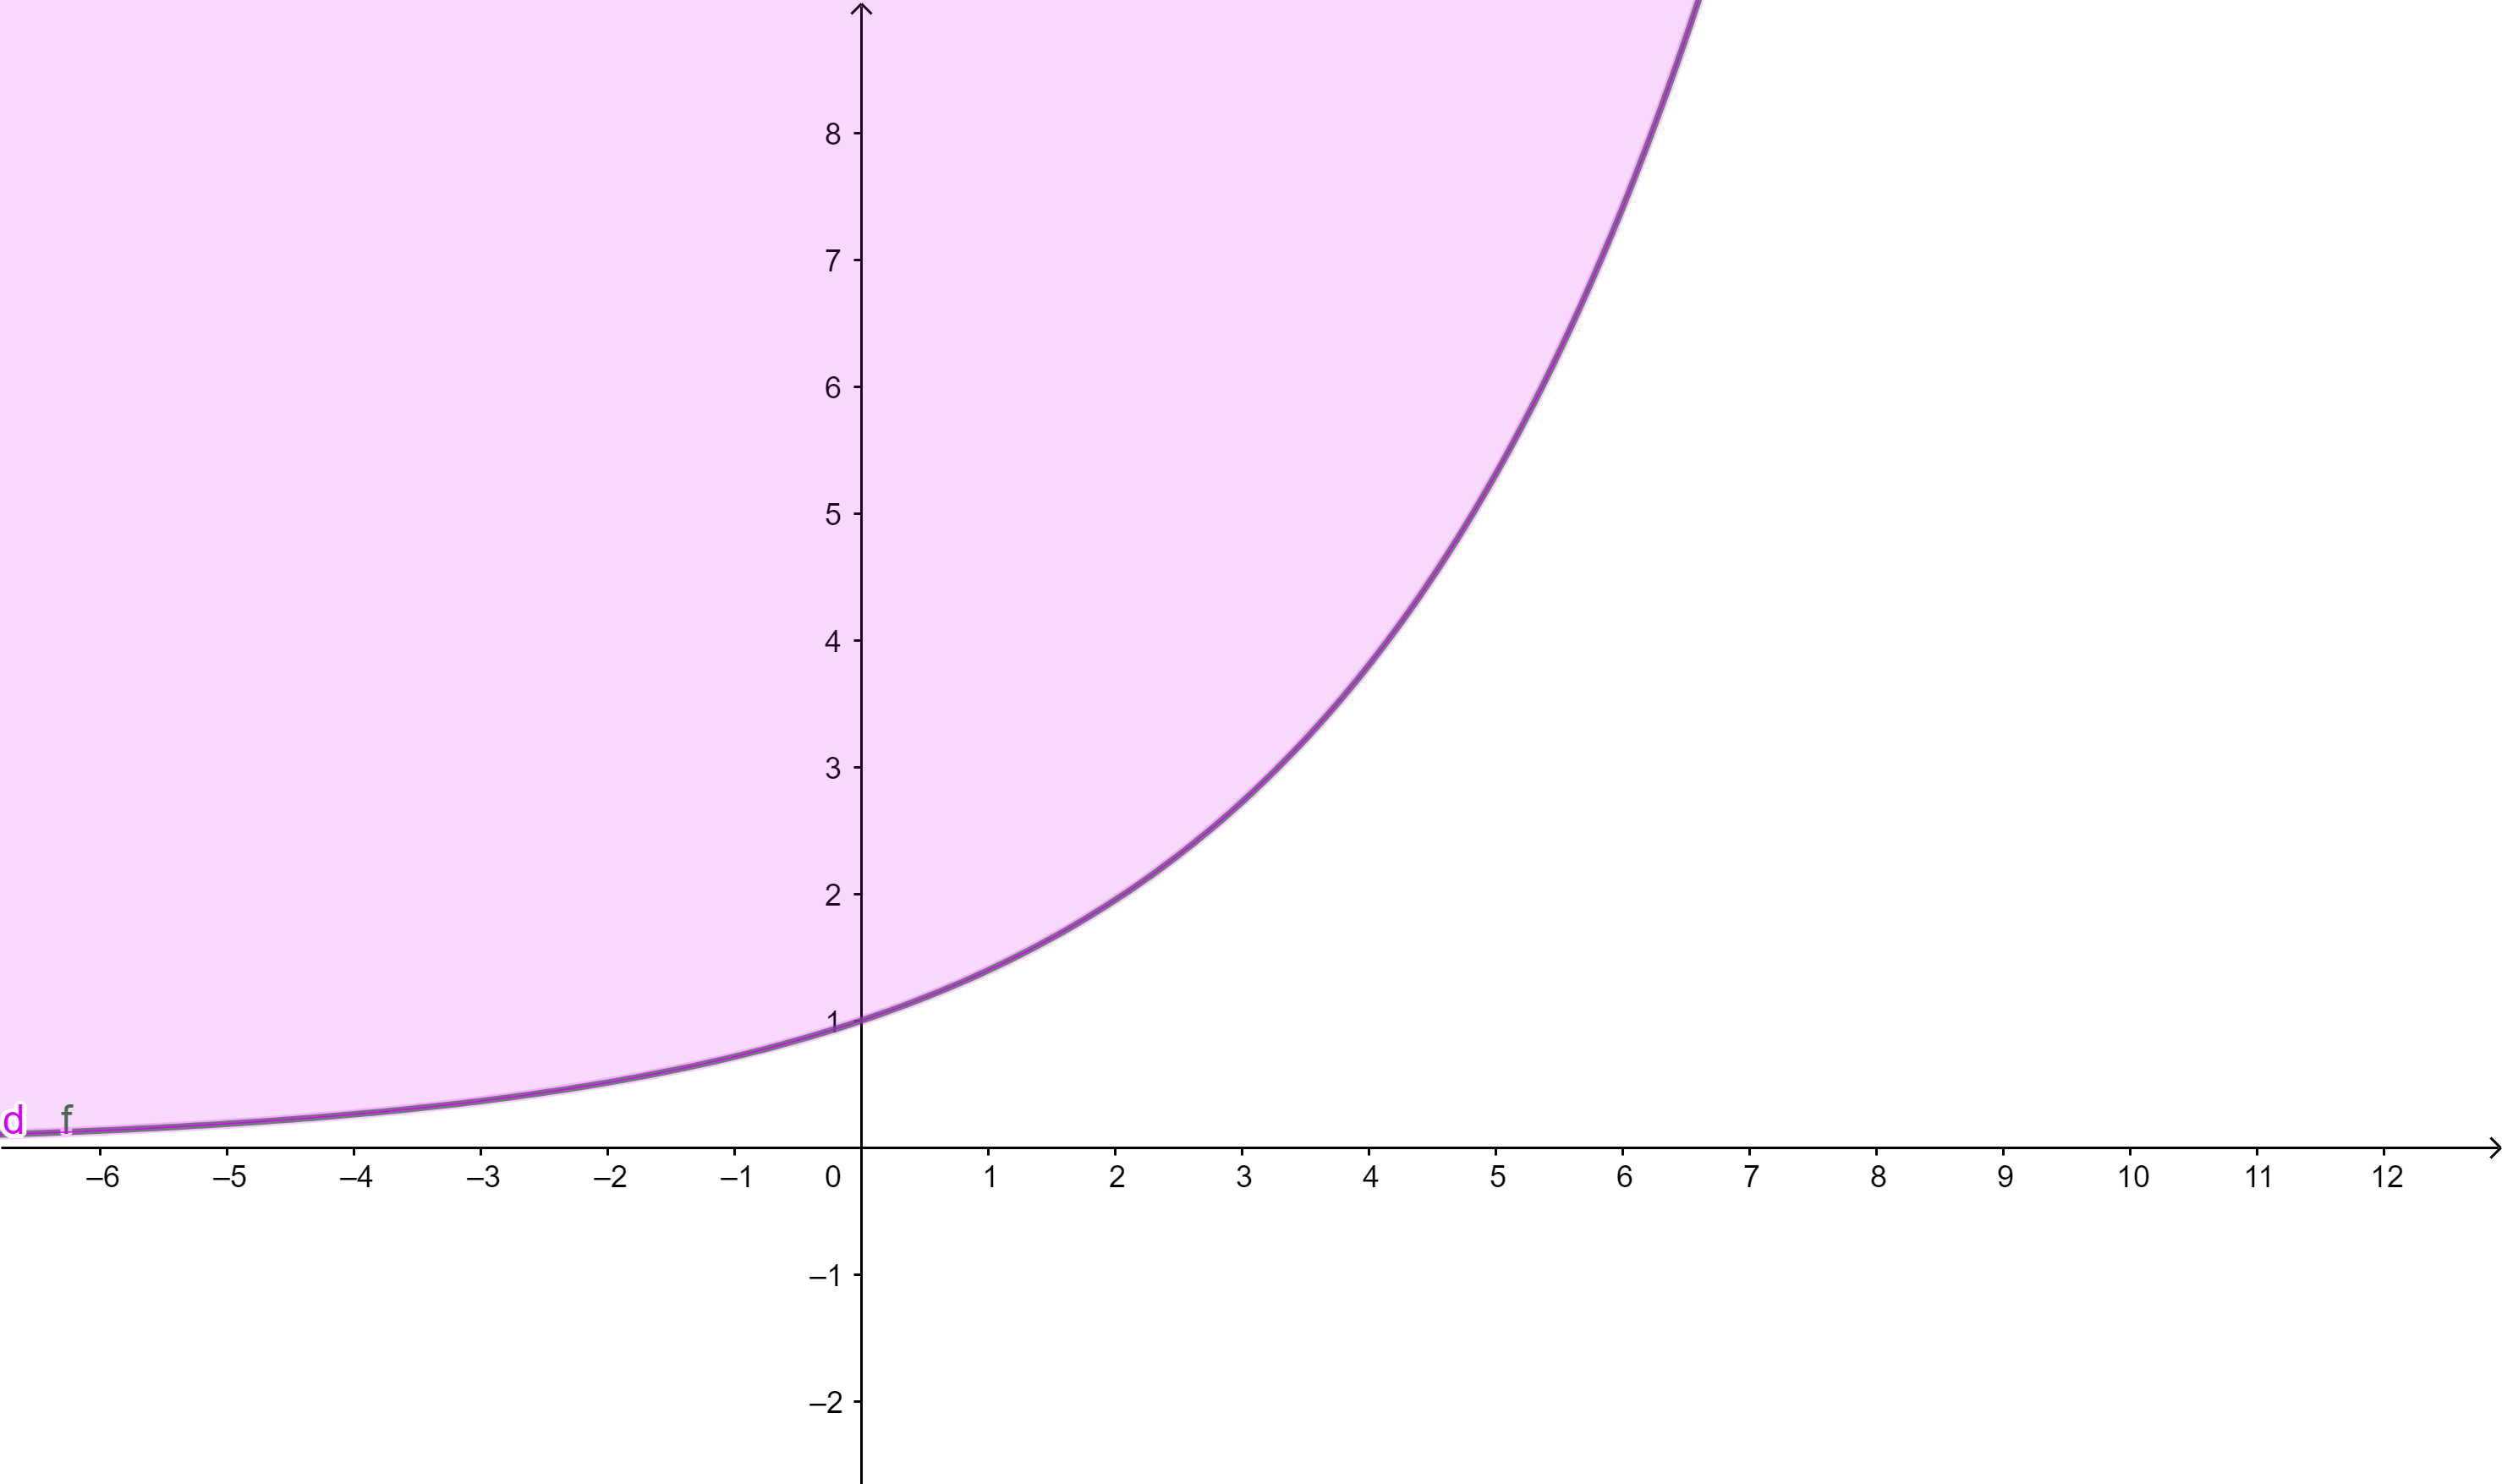

Já a função cúbica abaixo, define uma região não convexa.

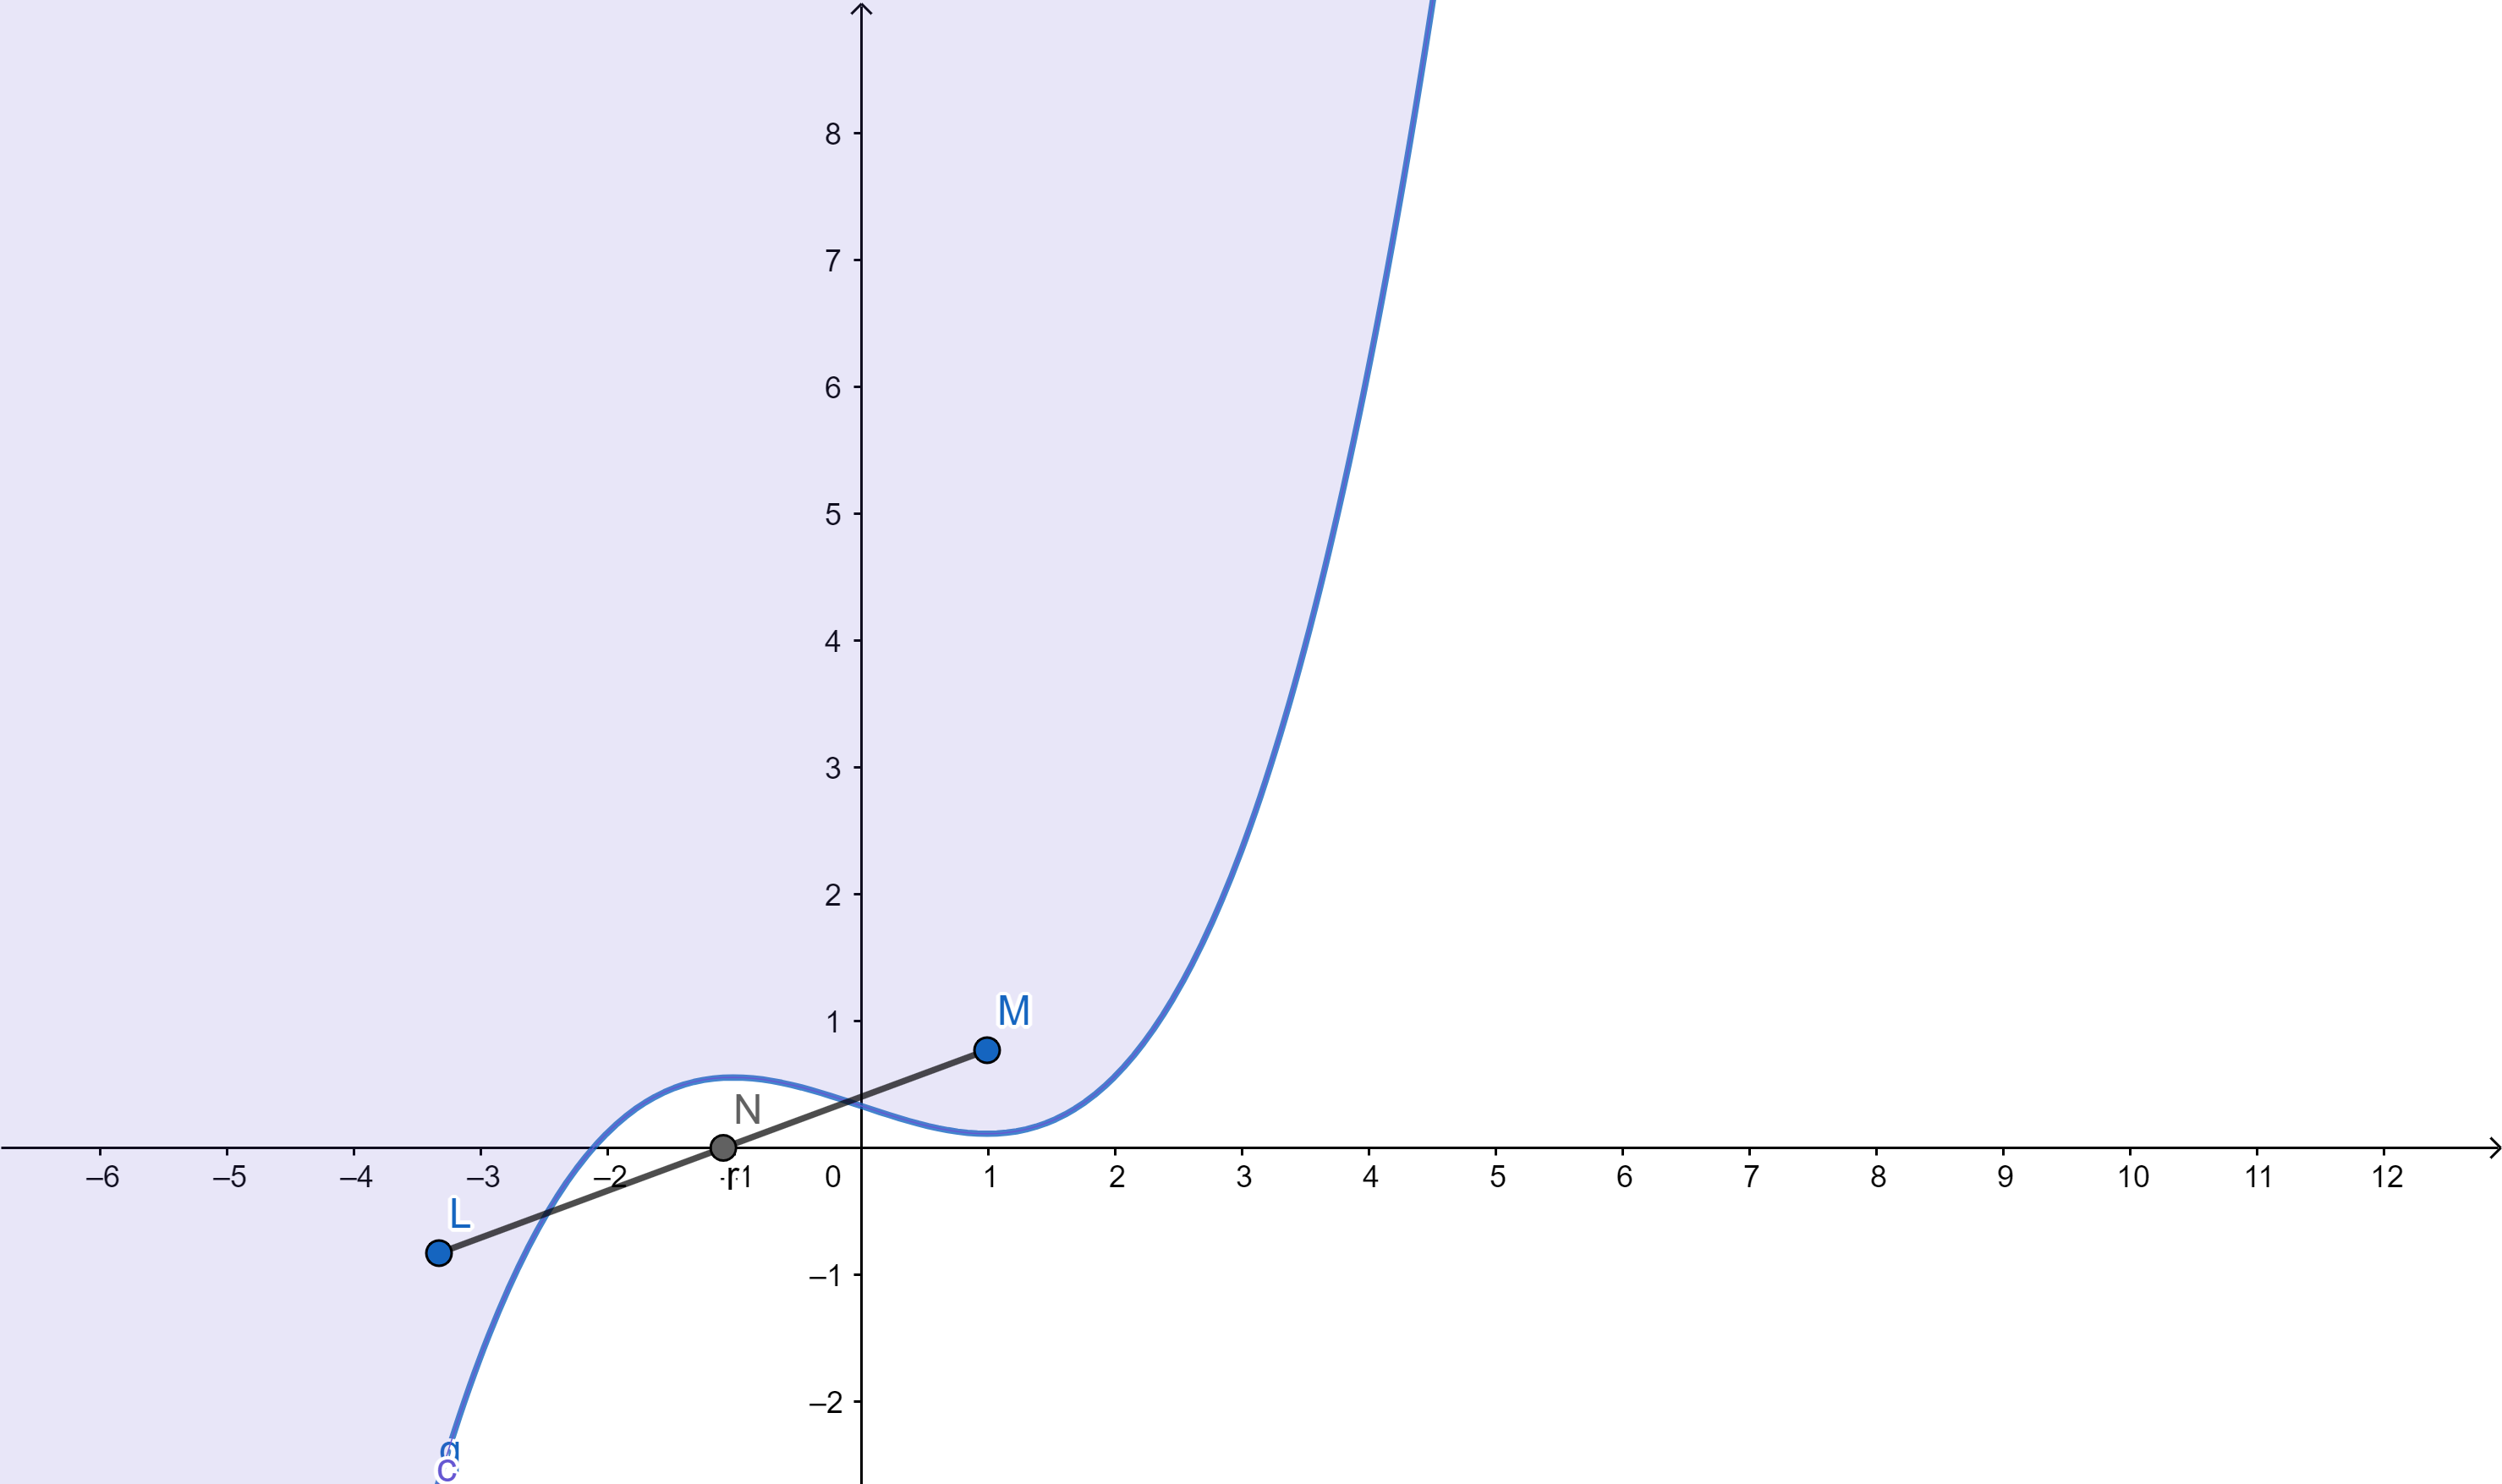

### Linearização

Suponhamos que exista num problema de otimização uma restrição definida por uma função $ f : R \rightarrow R $ convexa e diferenciável (e não linear, claro). Suponhamos também que saibamos um certo intervalo $I$ do domínio $R$ onde essa restrição é ativa; ou seja, saibamos um certo $I$ tal que se $x \in I$, então $(x, f(x))$ pertence ao bordo da região factível do problema.

Então podemos aproximar essa restrição por uma série de restrições lineares sem perdermos nenhum ponto da região factível. Faremos isso particionando o intervalo $I$ em $n$ pontos $x_1, x_2, x_3, \dots, x_n$ e tomando as retas tangentes em cada um dos pontos $(x_1, f(x_1)),(x_2, f(x_2)),(x_3, f(x_3)), \dots, (x_n, f(x_n))$ como curvas a definir as novas restrições.

OBS 1: como a função é convexa, todo os pontos que obedecerem à cada uma das novas restrições lineares vai também obedecer à antiga restrição não linear. Assim, podemos apenas adicionar uma seção do plano inteira como nova restrição. Isso é bom pois alternativamente, ao aproximar a função por segmentos de reta, teríamos que criar novas variáveis e as novas restrições (que seriam lógicas) seriam mais complicadas e menos legíveis.

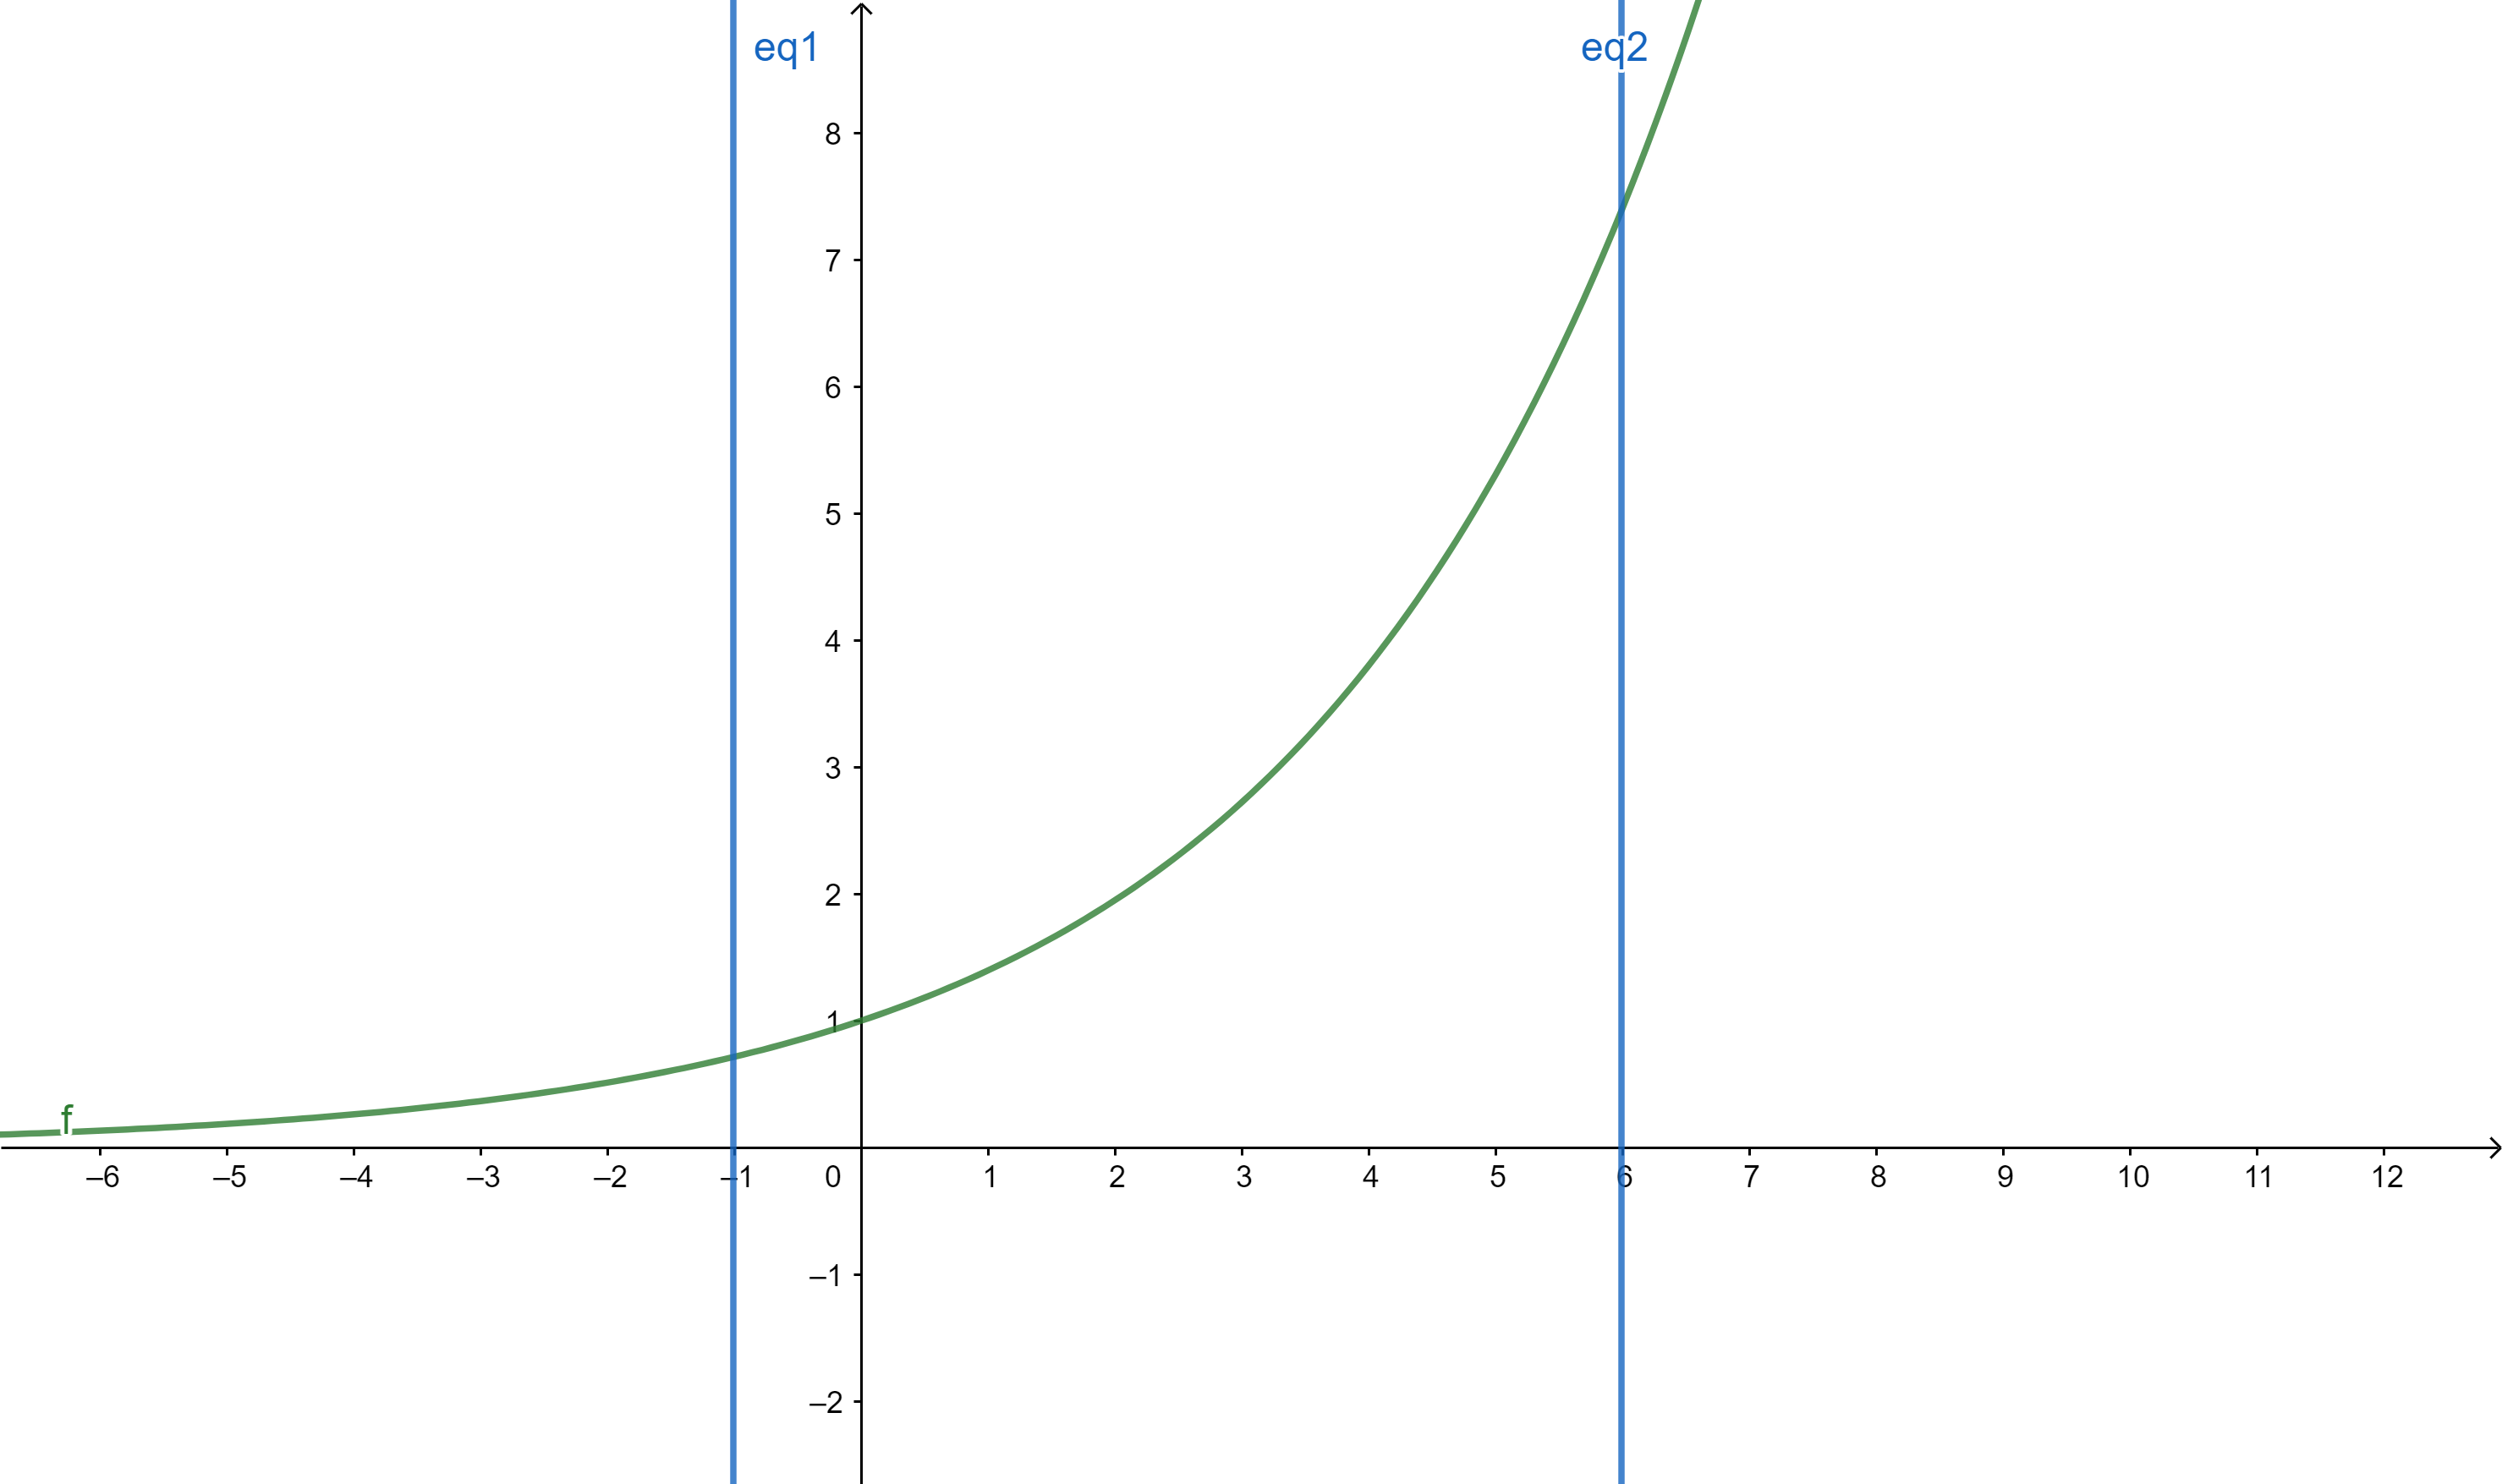

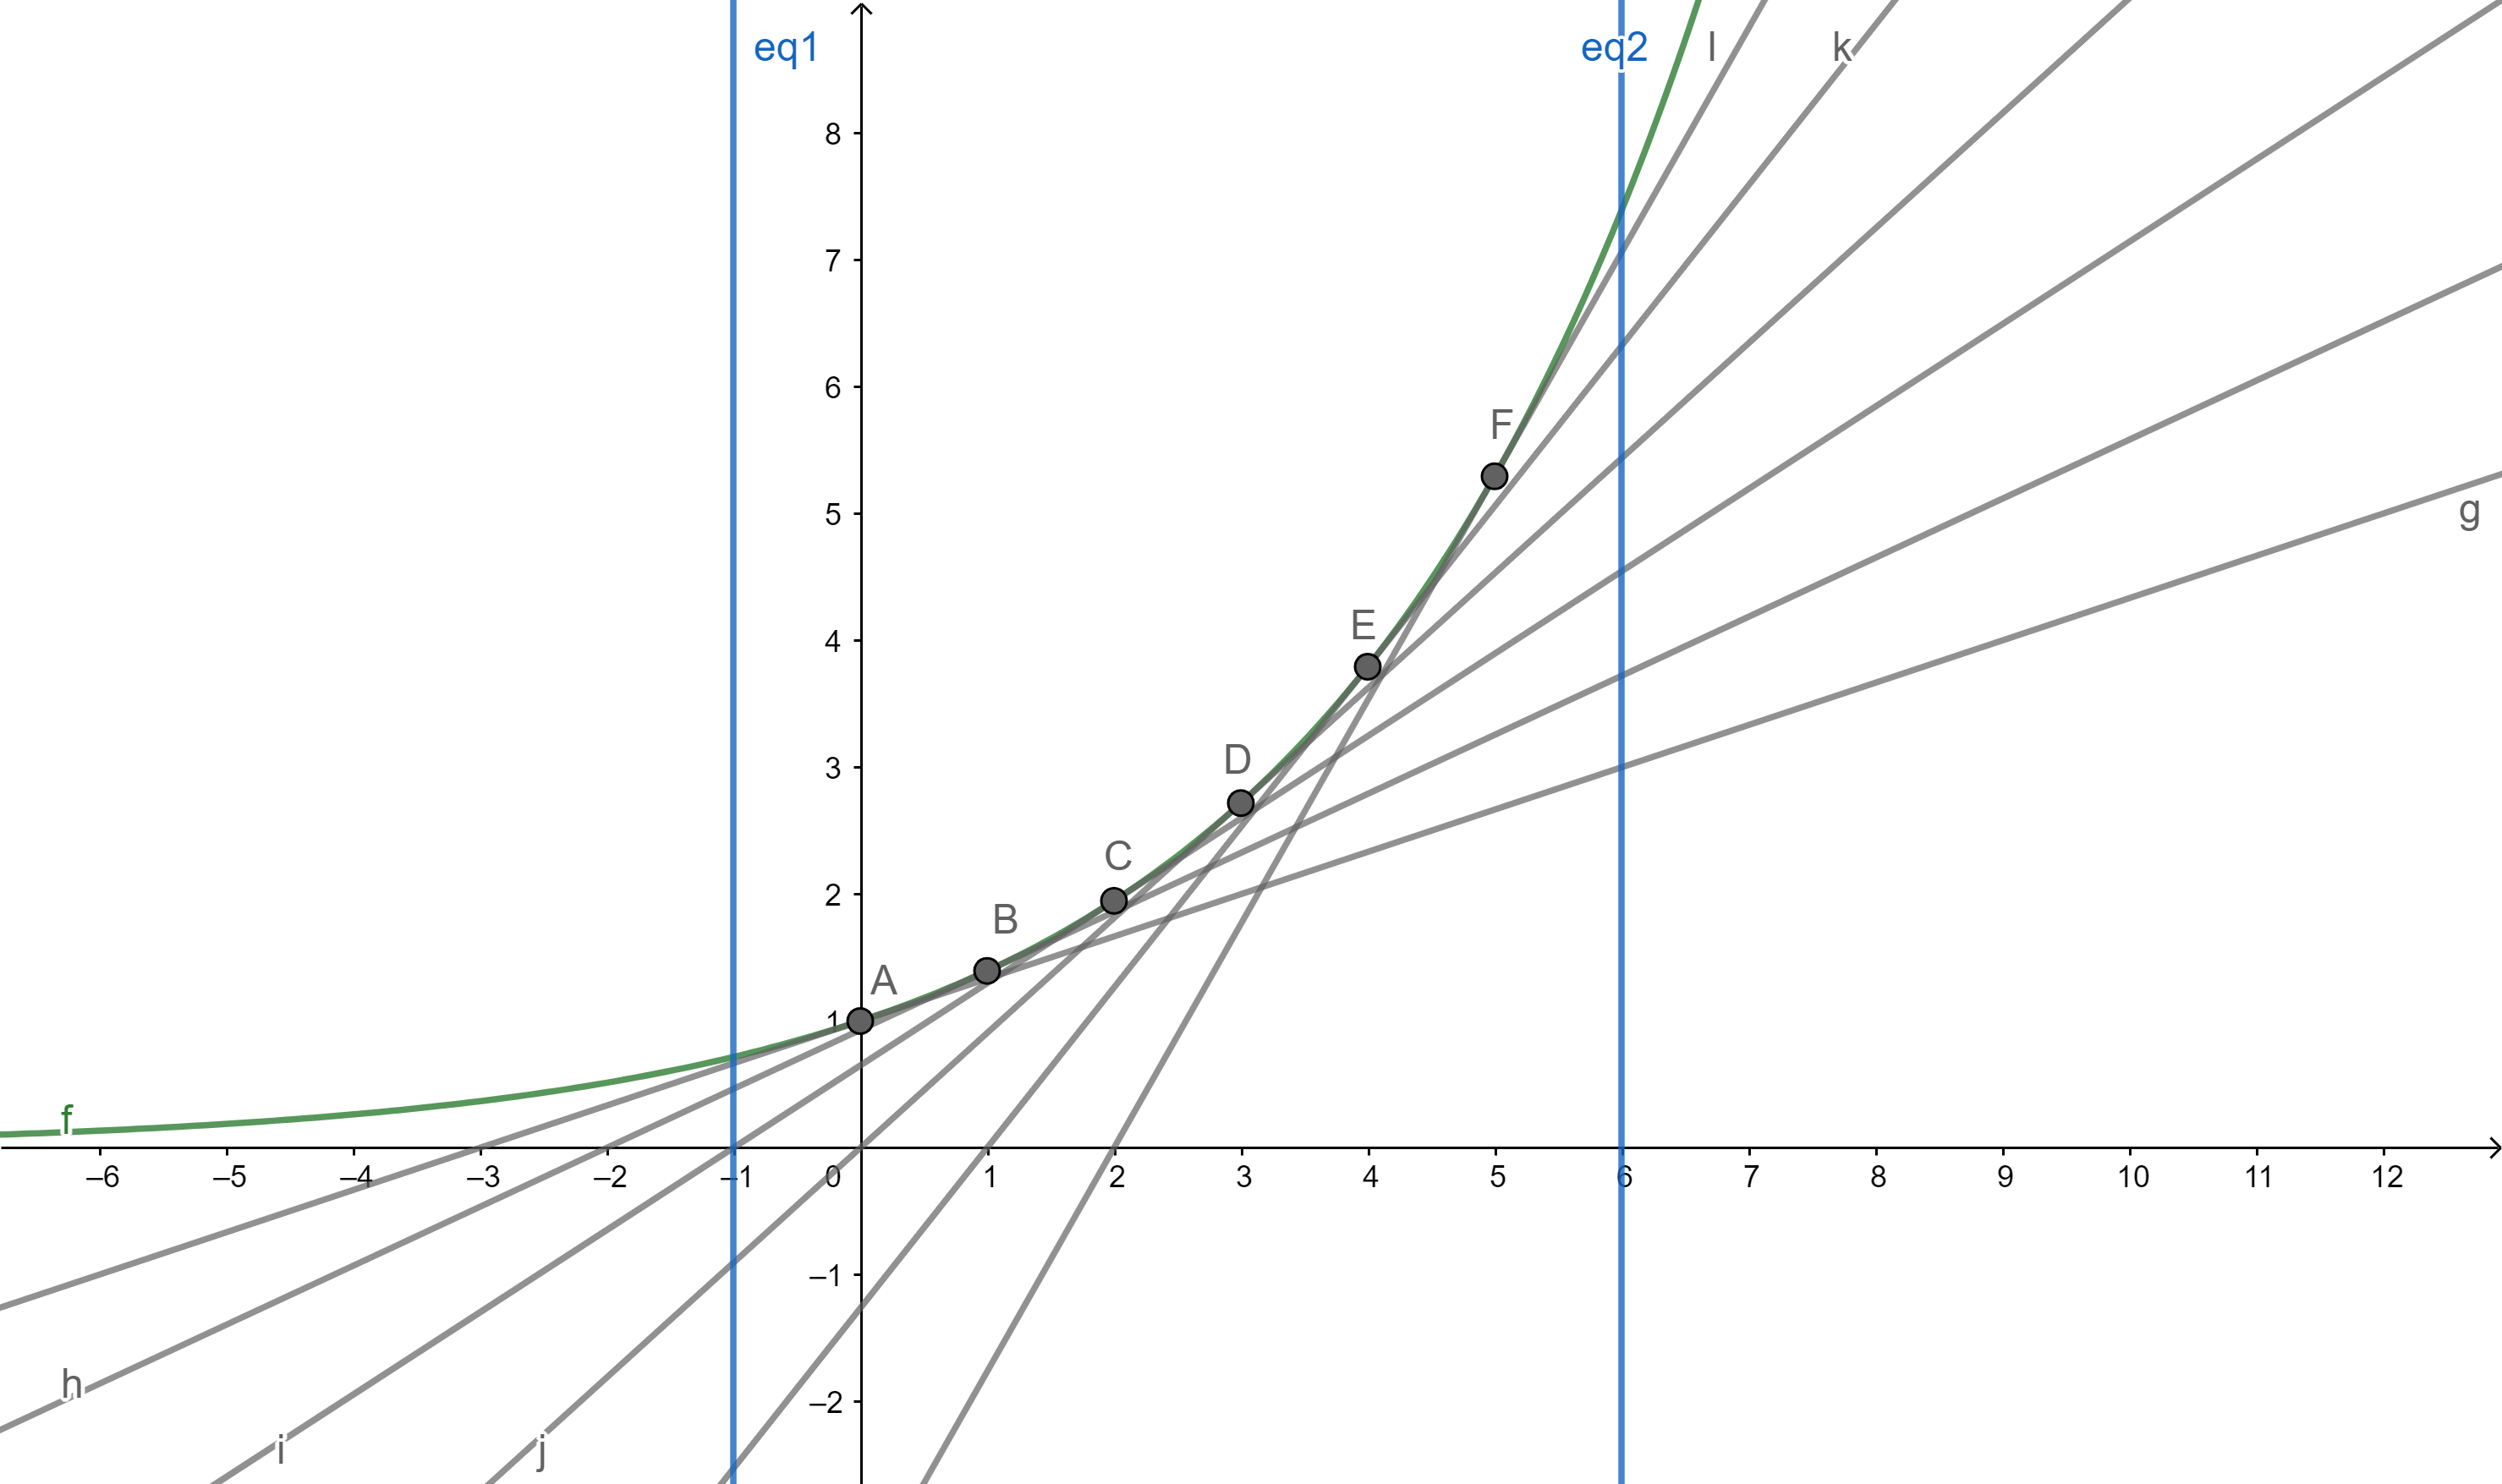

OBS 2: vamos acabar incluindo pontos que não deveriam estar dentro da região factível, porém podemos aproximá-los da região factível tanto quanto quisermos, apenas adicionando mais restrições lineares. Isso seria feito particionando o intervalo em mais pontos. Além disso, dada uma tolerância, podemos adicionar novas restrições iterativamente até que a distância dos pontos de interesse (os que o simplex deve escolher como ótimo) à região factível seja menor do que essa tolerância. E ainda mais do que isso, ao adicionar iterativamente novas restrições, o problema a ser resolvido não precisa considerar de novo todas as outras restrições, pois sabemos que o próximo ponto ótimo estará na região definida pelos segmentos que ligam o último ponto ótimo e seus "vizinhos" na partição e pela tangente que será gerada a partir do último ponto ótimo.

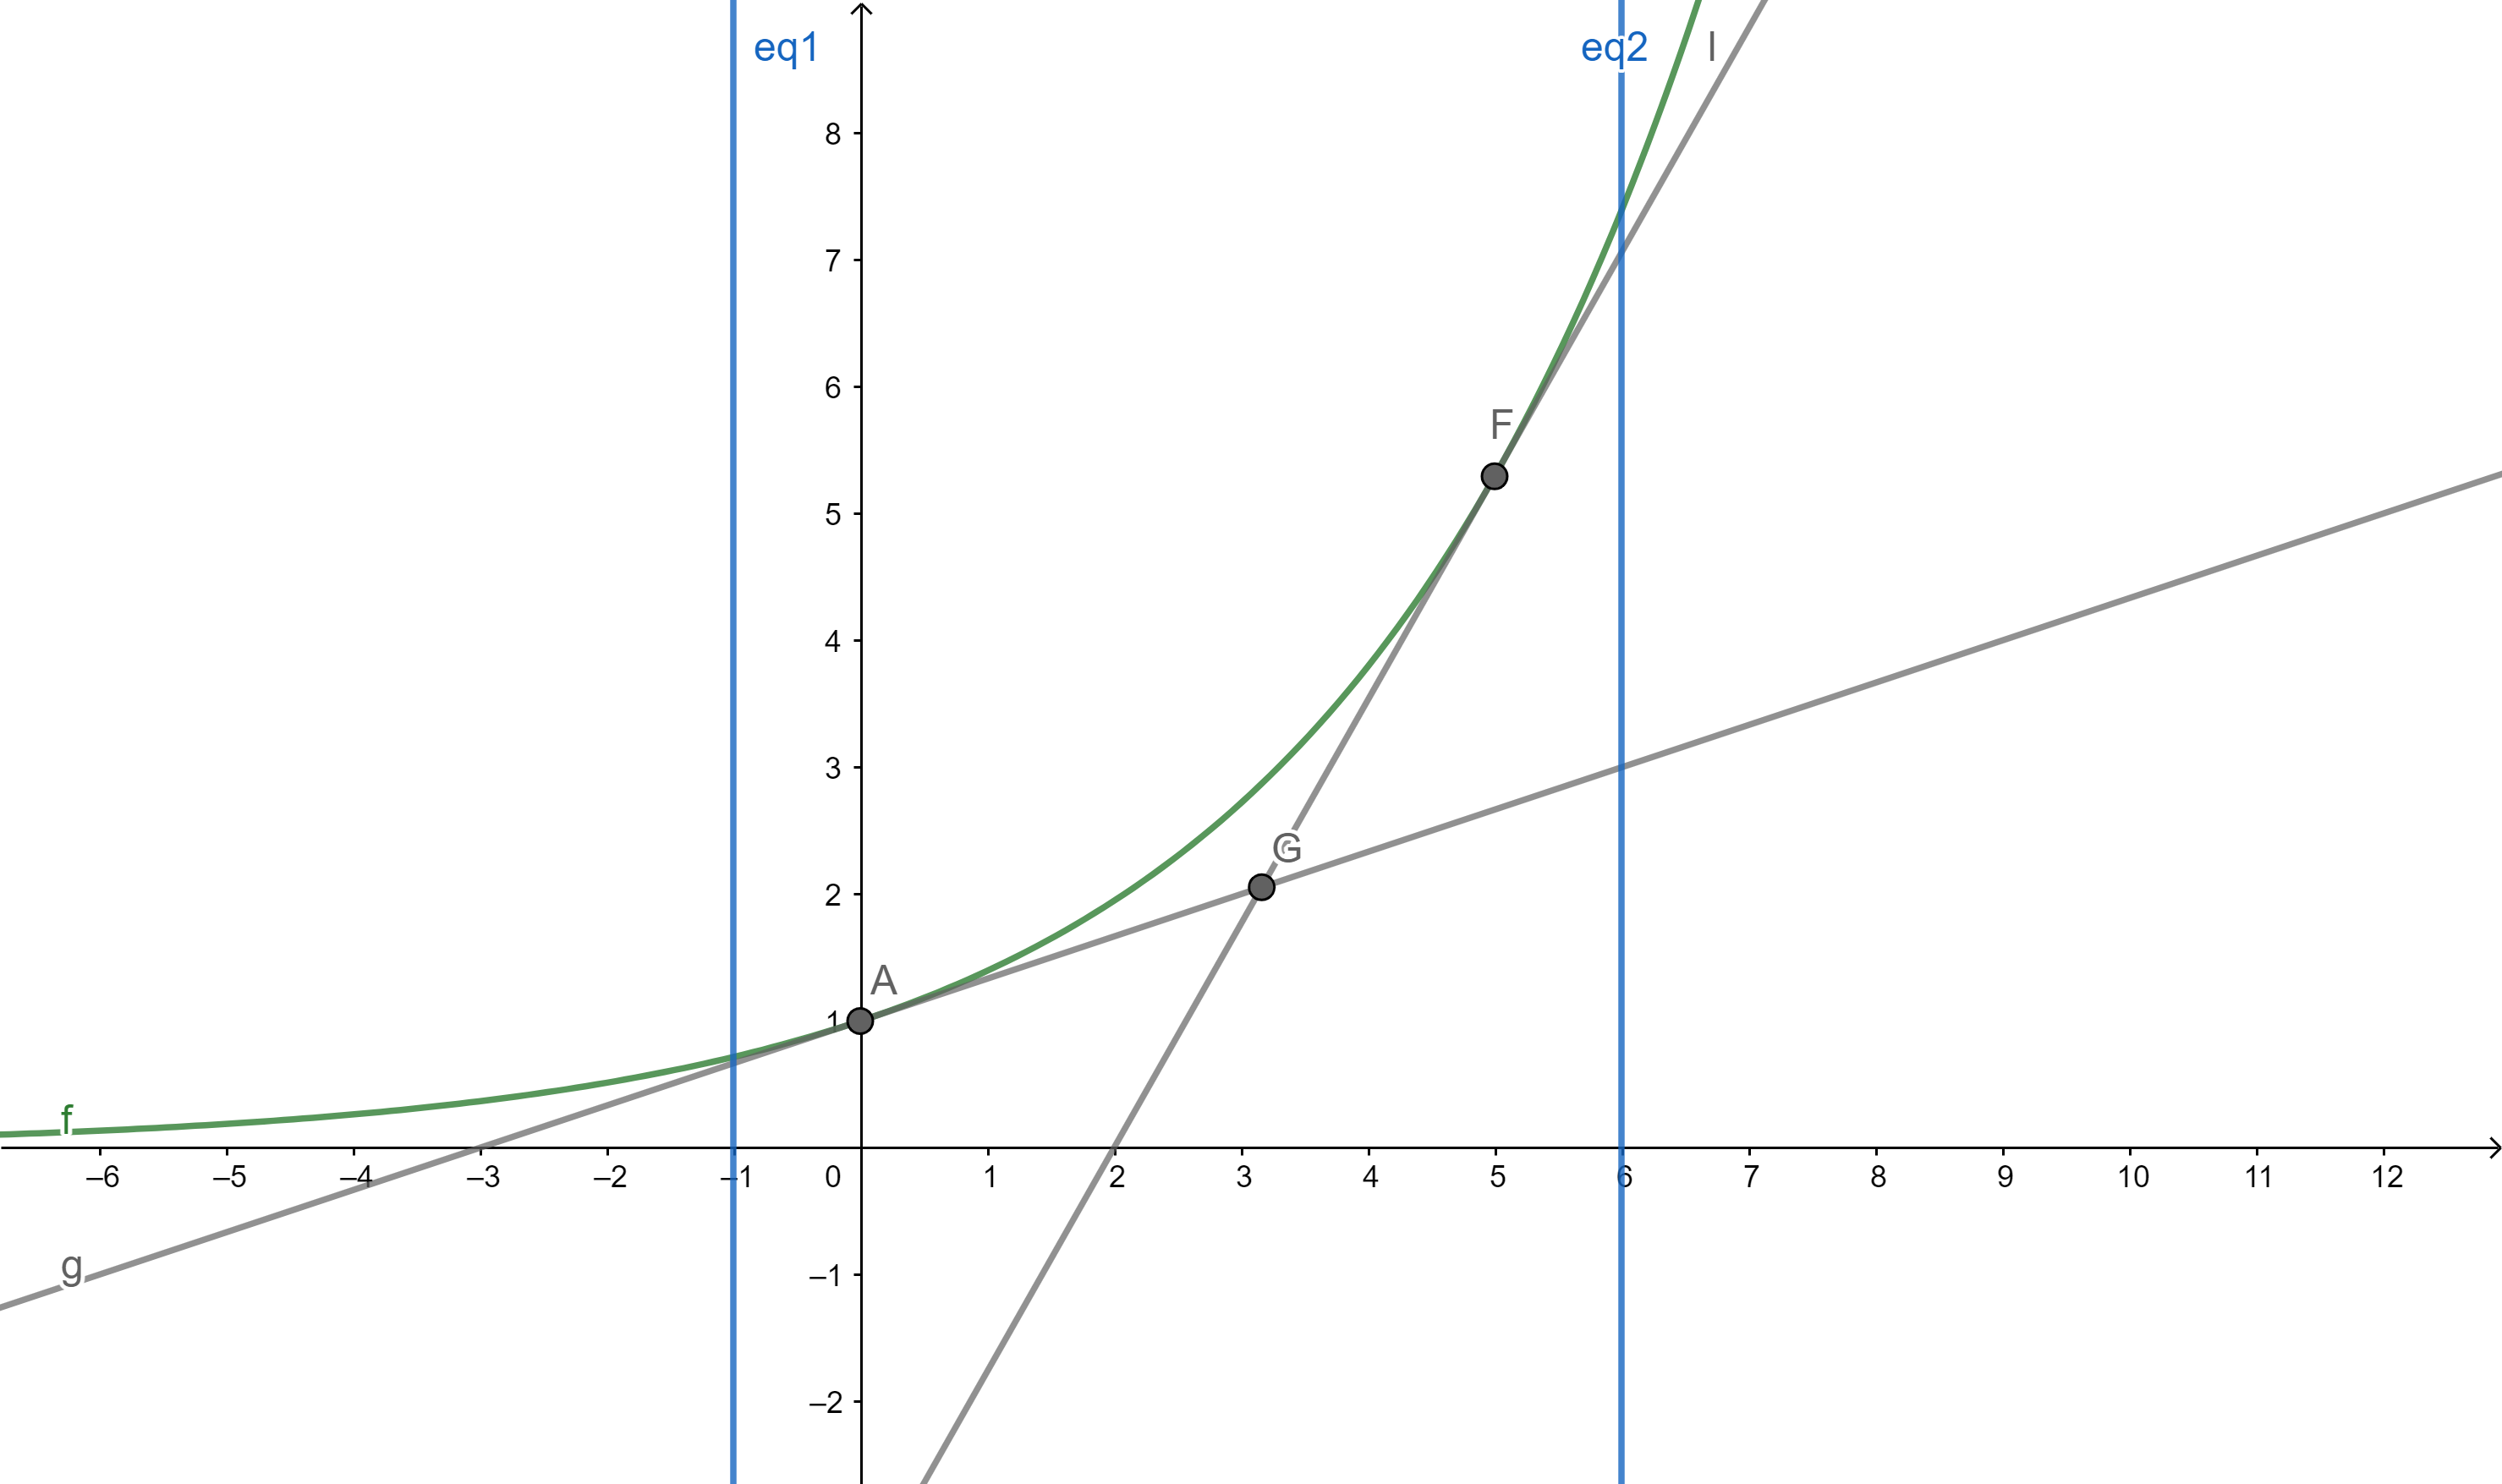

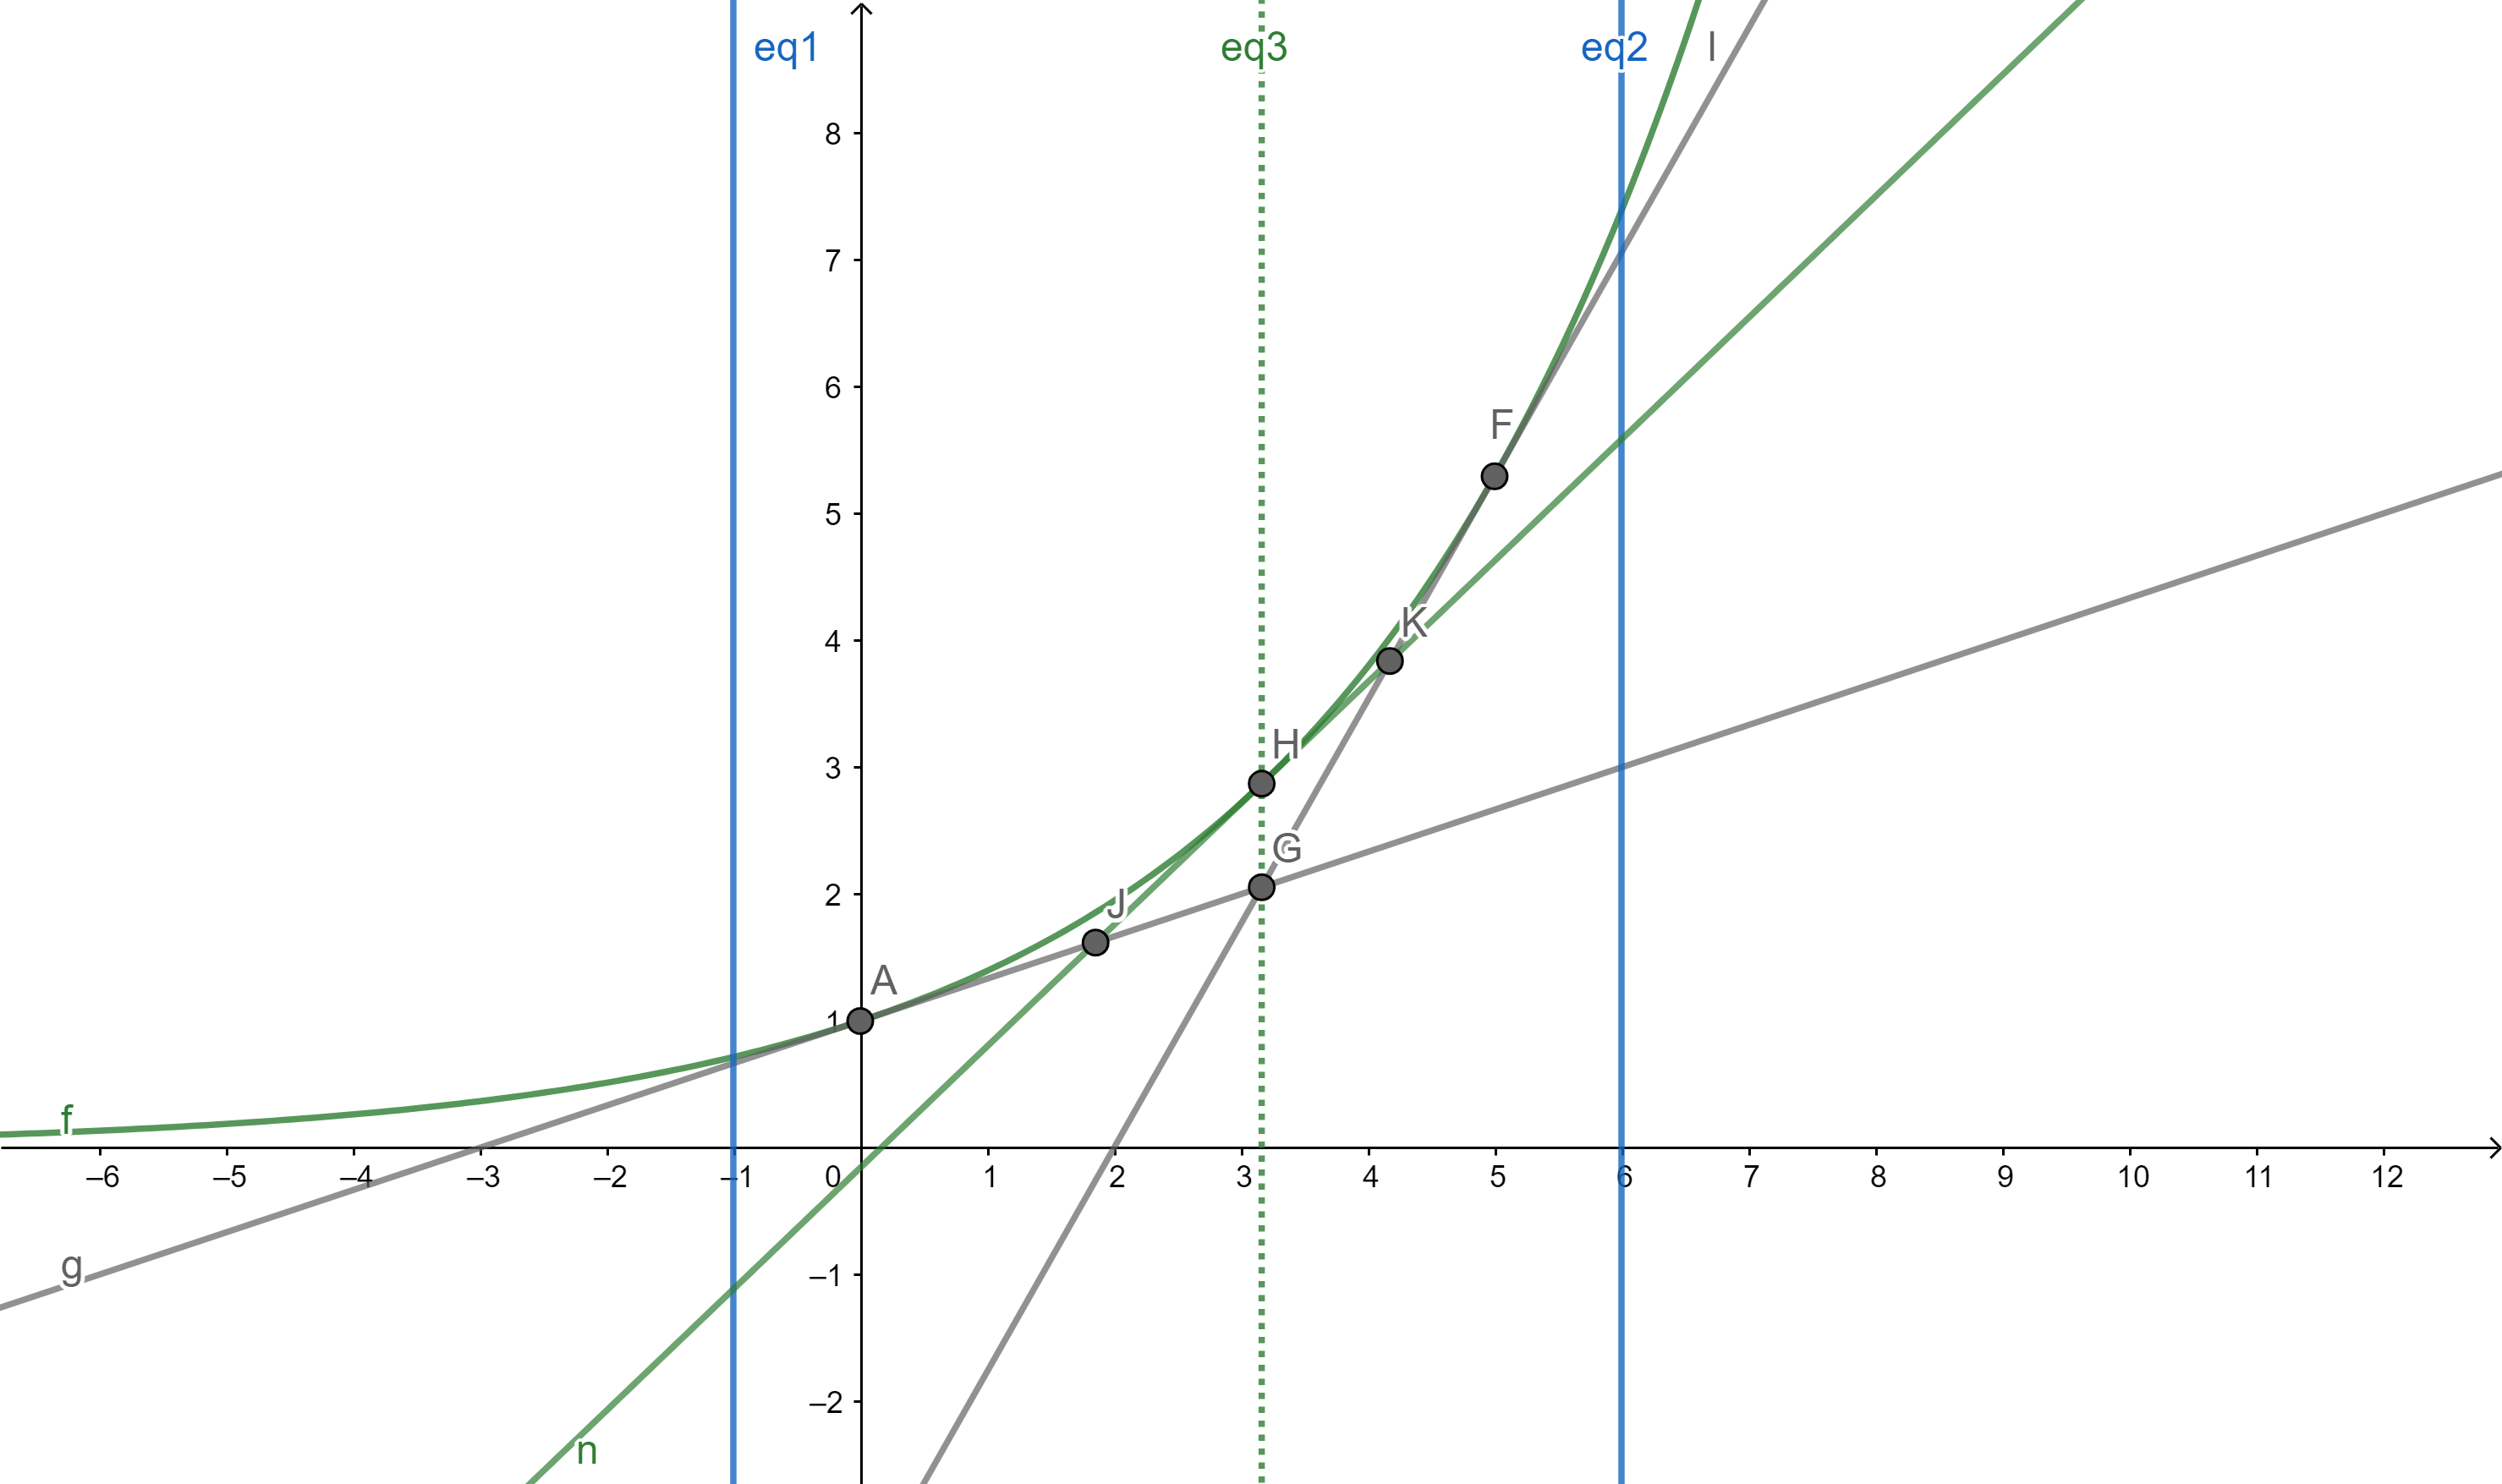

### Aplicação em redes elétricas 

#### Fluxo de Potências Ótimo

Imagine que tenhamos vários Pontos de Distribuição de energia elétrica, em que cada um desses pontos possua:
* uma demanda de energia a ser atendida;
* um conjunto de usinas geradoras de energia (cada usina possui uma capacidade máxima de geração e um custo por unidade de energia produzida). 

Existem ligações entre esses Pontos de Distribuição, são as Linhas de Transmissão. Cada Linha de Transmissão possui:
* um par de Pontos de Distribuição, em que um deles é seu ponto inicial e o outro é o ponto final;
* uma quantidade máxima de energia que pode passar por ela (para não incendiar);
* propriedades físicas como resistência, susceptância...

Fica mais fácil visualizar se pensarmos nessa rede elétrica como um grafo: os Pontos de Distribuição são os vértices e as Linhas de Transmissão são as arestas.

Dadas as definições, nosso objetivo é definir:
* as quantidades de energia gerada em cada usina;
* o fluxo de energia em cada aresta;

de forma a minimizar os custos totais, e respeitando as seguintes restrições:
* a capacidade máxima de geração de cada usina;
* o fluxo máximo de energia a passar em cada aresta;
* que a soma de toda energia que chega menos toda energia que sai de cada vértice consiga suprir a demanda desse vértice. Isso quer dizer: a soma das gerações das usinas associadas ao vértice, mais a energia que chega pelas arestas (que é a energia enviada pelos outros vértices menos as **perdas** de energia causadas pela resistência dos fios), menos a energia que sai pelas arestas tem que dar o valor da demanda.
Temos pela Física a restrição de que o valor da perda em uma aresta é maior ou igual que a resistência vezes o quadrado do fluxo que passa nessa aresta. 

Nossa modelagem fica a seguinte:

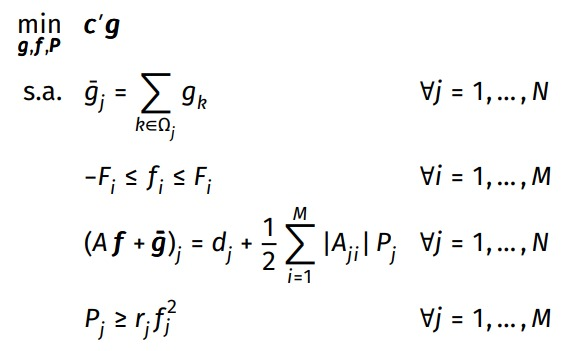

Obs: As perdas de cada aresta distribuímos uniformemente entre os dois vértices associados.

Note que o modelo acima não é linear, por conta da restrição de perda ser uma função quadrática. Então, linearizamos da forma como aprendemos antes nesse documento: 
Para cada $i$ de $1$ a $M$:
1. Definimos $Q$ pontos $f_q$ uniformemente distribuídos no intervalo $[-F_i,F_i]$ da seguinte forma: $f_q = -F_i + 2F_i(q-1)/(Q-1)$
2. Para cada $q = 1, \dots, Q$, definimos a restrição: $P_i \geq 2 r_i f_q (f - f_q) + r_i f_q ^2$

### Comentários

Esse trabalho descreve um método de solução aproximada para um problema de PLI com uma ou mais restrições definidas por funções unidimensionais convexas e diferenciáveis. Mas podemos ir além! Por exemplo, se tivermos um problema de PLI com funções multidimensionais convexas e diferenciáveis podemos usar uma estratégia análoga, aproximando a superfície por planos/hiperplanos.

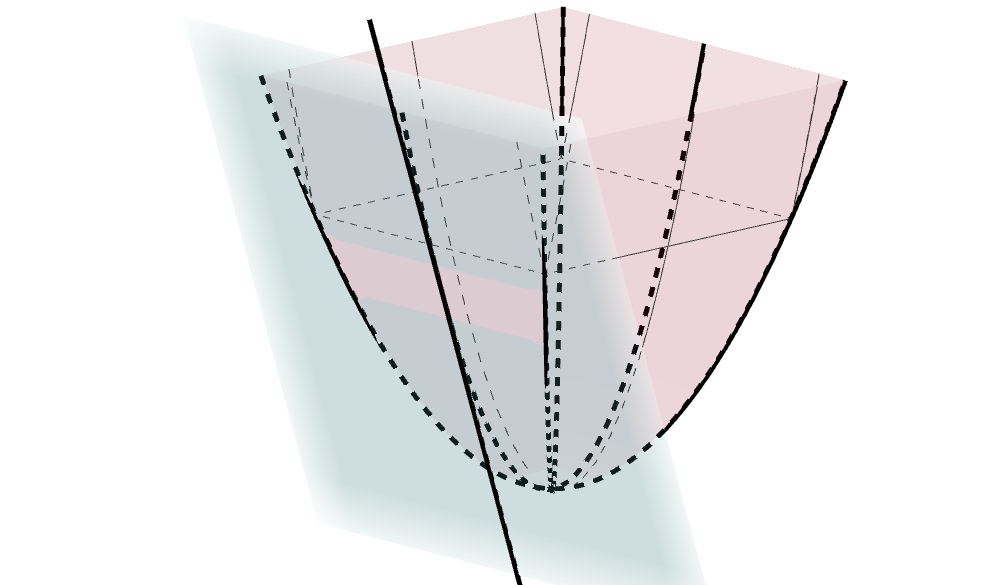

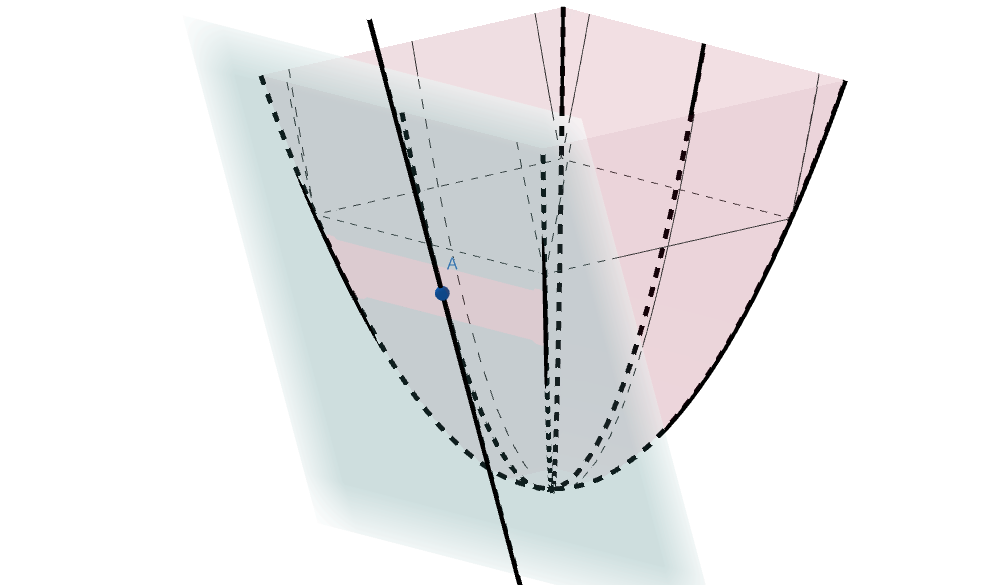